# Cleaning US Census Data

You just got hired as a Data Analyst at the Census Bureau, which collects census data and creates interesting visualizations and insights from it.

The person who had your job before you left you all the data they had for the most recent census. It is in multiple `csv` files. They didn't use pandas, they would just look through these `csv` files manually whenever they wanted to find something. Sometimes they would copy and paste certain numbers into Excel to make charts.

The thought of it makes you shiver. This is not scalable or repeatable.

Your boss wants you to make some scatterplots and histograms by the end of the day. Can you get this data into `pandas` and into reasonable shape so that you can make these histograms?

## Inspect the Data!

1. The first visualization your boss wants you to make is a scatterplot that shows average income in a state vs proportion of women in that state.

   Open some of the census `csv` files that came with the kit you downloaded. How are they named? What kind of information do they hold? Will they help us make this graph?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


d = pd.read_csv("states0.csv")
print(d.head())
print(d.shape)

   Unnamed: 0       State  TotalPop Hispanic   White   Black  Native   Asian  \
0           0     Alabama   4830620    3.75%  61.88%  31.25%   0.45%   1.05%   
1           1      Alaska    733375    5.91%  60.91%   2.85%  16.39%   5.45%   
2           2     Arizona   6641928   29.57%  57.12%   3.85%   4.36%   2.88%   
3           3    Arkansas   2958208    6.22%  71.14%  18.97%   0.52%   1.14%   
4           4  California  38421464   37.29%  40.22%   5.68%   0.41%  13.05%   

  Pacific       Income            GenderPop  
0   0.03%  $43,296.36     2341093M_2489527F  
1   1.06%  $70,354.74       384160M_349215F  
2   0.17%  $54,207.82     3299088M_3342840F  
3   0.15%  $41,935.63     1451913M_1506295F  
4   0.35%  $67,264.78   19087135M_19334329F  
(6, 11)


2. It will be easier to inspect this data once we have it in a DataFrame. You can't even call `.head()` on these `csv`s! How are you supposed to read them?

   Using `glob`, loop through the census files available and load them into DataFrames. Then, concatenate all of those DataFrames together into one DataFrame, called something like `us_census`.

In [2]:
import glob 

census_data_to_combine = glob.glob("states*.csv")

us_census = []
for census_data in census_data_to_combine:
    data = pd.read_csv(census_data)
    us_census.append(data)

us_census = pd.concat(us_census)

print(us_census.shape)


(60, 11)


3. Look at the `.columns` and the `.dtypes` of the `us_census` DataFrame. Are those datatypes going to hinder you as you try to make histograms?

In [3]:
print(us_census.columns)
print(us_census.dtypes)

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop'],
      dtype='object')
Unnamed: 0     int64
State         object
TotalPop       int64
Hispanic      object
White         object
Black         object
Native        object
Asian         object
Pacific       object
Income        object
GenderPop     object
dtype: object


4. Look at the `head()` of the DataFrame so that you can understand why some of these `dtypes` are objects instead of integers or floats.

   Start to make a plan for how to convert these columns into the right types for manipulation.

In [4]:
print(us_census.head())

   Unnamed: 0       State  TotalPop Hispanic   White   Black  Native   Asian  \
0           0     Alabama   4830620    3.75%  61.88%  31.25%   0.45%   1.05%   
1           1      Alaska    733375    5.91%  60.91%   2.85%  16.39%   5.45%   
2           2     Arizona   6641928   29.57%  57.12%   3.85%   4.36%   2.88%   
3           3    Arkansas   2958208    6.22%  71.14%  18.97%   0.52%   1.14%   
4           4  California  38421464   37.29%  40.22%   5.68%   0.41%  13.05%   

  Pacific       Income            GenderPop  
0   0.03%  $43,296.36     2341093M_2489527F  
1   1.06%  $70,354.74       384160M_349215F  
2   0.17%  $54,207.82     3299088M_3342840F  
3   0.15%  $41,935.63     1451913M_1506295F  
4   0.35%  $67,264.78   19087135M_19334329F  


## Regex to the Rescue

5. Use regex to turn the `Income` column into a format that is ready for conversion into a numerical type.

In [5]:
us_census['Income'] = us_census['Income'].replace('[\$\,]','',regex=True)
us_census['Income'] = pd.to_numeric(us_census['Income'])

print(us_census['Income'].head())

0    43296.36
1    70354.74
2    54207.82
3    41935.63
4    67264.78
Name: Income, dtype: float64


6. Look at the `GenderPop` column. We are going to want to separate this into two columns, the `Men` column, and the `Women` column.

   Split the column into those two new columns using `str.split` and separating out those results.

In [6]:
gender_split = us_census['GenderPop'].str.split("_")

us_census['Men'] = gender_split.str.get(0)
us_census['Women'] = gender_split.str.get(1)

print(us_census['Men'].head())
print(us_census['Women'].head())

0     2341093M
1      384160M
2     3299088M
3     1451913M
4    19087135M
Name: Men, dtype: object
0     2489527F
1      349215F
2     3342840F
3     1506295F
4    19334329F
Name: Women, dtype: object


7. Convert both of the columns into numerical datatypes.

   There is still an `M` or an `F` character in each entry! We should remove those before we convert.

In [7]:
us_census['Men'] = us_census['Men'].str.split('(\d+)',expand = True)[1]
us_census['Men'] = pd.to_numeric(us_census.Men)

us_census['Women']= us_census['Women'].str.split('(\d+)',expand = True)[1]
us_census['Women'] = pd.to_numeric(us_census.Women)

print(us_census['Men'].head())
print(us_census['Women'].head())

0     2341093
1      384160
2     3299088
3     1451913
4    19087135
Name: Men, dtype: int64
0     2489527.0
1      349215.0
2     3342840.0
3     1506295.0
4    19334329.0
Name: Women, dtype: float64


In [8]:
#converting float into int for women column
us_census['Women'] = us_census['Women'].astype("Int64")

In [9]:
print(us_census.head())

   Unnamed: 0       State  TotalPop Hispanic   White   Black  Native   Asian  \
0           0     Alabama   4830620    3.75%  61.88%  31.25%   0.45%   1.05%   
1           1      Alaska    733375    5.91%  60.91%   2.85%  16.39%   5.45%   
2           2     Arizona   6641928   29.57%  57.12%   3.85%   4.36%   2.88%   
3           3    Arkansas   2958208    6.22%  71.14%  18.97%   0.52%   1.14%   
4           4  California  38421464   37.29%  40.22%   5.68%   0.41%  13.05%   

  Pacific    Income            GenderPop       Men     Women  
0   0.03%  43296.36    2341093M_2489527F   2341093   2489527  
1   1.06%  70354.74      384160M_349215F    384160    349215  
2   0.17%  54207.82    3299088M_3342840F   3299088   3342840  
3   0.15%  41935.63    1451913M_1506295F   1451913   1506295  
4   0.35%  67264.78  19087135M_19334329F  19087135  19334329  


8. Now you should have the columns you need to make the graph and make sure your boss does not slam a ruler angrily on your desk because you've wasted your whole day cleaning your data with no results to show!

   Use matplotlib to make a scatterplot!
   
   ```py
   plt.scatter(the_women_column, the_income_column)
   ```
   
   Remember to call `plt.show()` to see the graph!

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


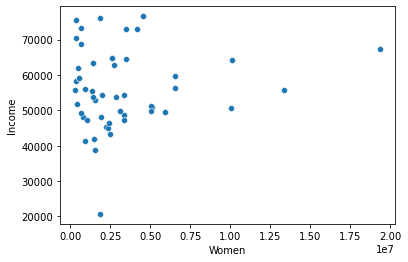

In [10]:
sns.scatterplot(us_census.Women,us_census.Income)
plt.show()

9. You want to double check your work. You know from experience that these monstrous csv files probably have `nan` values in them! Print out your column with the number of women per state to see.

   We can fill in those `nan`s by using pandas' `.fillna()` function.
   
   You have the `TotalPop` per state, and you have the `Men` per state. As an estimate for the `nan` values in the `Women` column, you could use the `TotalPop` of that state minus the `Men` for that state.
   
   Print out the `Women` column after filling the `nan` values to see if it worked!

In [11]:
#checking for nan values
print(us_census['Women'].isna().sum())

3


In [12]:
us_census['Women'] = us_census['TotalPop'] - us_census['Men']
print(us_census['Women'].isna().sum())

0


E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


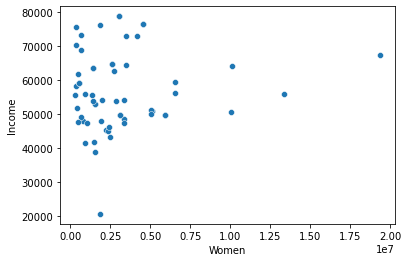

In [13]:
sns.scatterplot(us_census.Women,us_census.Income)
plt.show()

10. We forgot to check for duplicates! Use `.duplicated()` on your `census` DataFrame to see if we have duplicate rows in there.

In [14]:
duplicates = us_census.duplicated()
print(duplicates.value_counts())

False    60
dtype: int64


11. Drop those duplicates using the `.drop_duplicates()` function.

In [15]:
us_census = us_census.drop_duplicates()

12. Make the scatterplot again. Now, it should be perfect! Your job is secure, for now.

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


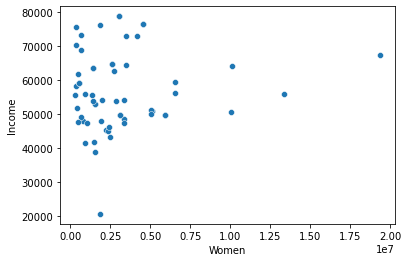

In [16]:
sns.scatterplot(us_census.Women,us_census.Income)
plt.show()

## Histogram of Races

13. Now your boss wants you to make a bunch of histograms out of the race data that you have. Look at the `.columns` again to see what the race categories are.

In [17]:
col_names = us_census.columns
print(col_names)

print(us_census.head())

Index(['Unnamed: 0', 'State', 'TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop', 'Men', 'Women'],
      dtype='object')
   Unnamed: 0       State  TotalPop Hispanic   White   Black  Native   Asian  \
0           0     Alabama   4830620    3.75%  61.88%  31.25%   0.45%   1.05%   
1           1      Alaska    733375    5.91%  60.91%   2.85%  16.39%   5.45%   
2           2     Arizona   6641928   29.57%  57.12%   3.85%   4.36%   2.88%   
3           3    Arkansas   2958208    6.22%  71.14%  18.97%   0.52%   1.14%   
4           4  California  38421464   37.29%  40.22%   5.68%   0.41%  13.05%   

  Pacific    Income            GenderPop       Men     Women  
0   0.03%  43296.36    2341093M_2489527F   2341093   2489527  
1   1.06%  70354.74      384160M_349215F    384160    349215  
2   0.17%  54207.82    3299088M_3342840F   3299088   3342840  
3   0.15%  41935.63    1451913M_1506295F   1451913   1506295  
4   0.35%  67264.78  19087135M_19

In [18]:
us_census = us_census.drop('Unnamed: 0', axis=1)

print(us_census.head())


        State  TotalPop Hispanic   White   Black  Native   Asian Pacific  \
0     Alabama   4830620    3.75%  61.88%  31.25%   0.45%   1.05%   0.03%   
1      Alaska    733375    5.91%  60.91%   2.85%  16.39%   5.45%   1.06%   
2     Arizona   6641928   29.57%  57.12%   3.85%   4.36%   2.88%   0.17%   
3    Arkansas   2958208    6.22%  71.14%  18.97%   0.52%   1.14%   0.15%   
4  California  38421464   37.29%  40.22%   5.68%   0.41%  13.05%   0.35%   

     Income            GenderPop       Men     Women  
0  43296.36    2341093M_2489527F   2341093   2489527  
1  70354.74      384160M_349215F    384160    349215  
2  54207.82    3299088M_3342840F   3299088   3342840  
3  41935.63    1451913M_1506295F   1451913   1506295  
4  67264.78  19087135M_19334329F  19087135  19334329  


14. Try to make a histogram for each one!

    You will have to get the columns into the numerical format, and those percentage signs will have to go.
    
    Don't forget to fill the `nan` values with something that makes sense! You probably dropped the duplicate rows when making your last graph, but it couldn't hurt to check for duplicates again.

In [19]:
#removing percentage sysmbol from hispanic column
us_census['Hispanic'] = us_census['Hispanic'].replace('[\%]','',regex=True)
us_census['Hispanic'] = pd.to_numeric(us_census['Hispanic'])
print(us_census['Hispanic'].head())

0     3.75
1     5.91
2    29.57
3     6.22
4    37.29
Name: Hispanic, dtype: float64


In [23]:
# removing percentage symbol from all other columns 

us_census['White'] = us_census['White'].replace('[\%]','',regex=True)
us_census['White'] = pd.to_numeric(us_census['White'])

us_census['Black'] = us_census['Black'].replace('[\%]','',regex=True)
us_census['Black'] = pd.to_numeric(us_census['Black'])

us_census['Native'] = us_census['Native'].replace('[\%]','',regex=True)
us_census['Native'] = pd.to_numeric(us_census['Native'])

us_census['Asian'] = us_census['Asian'].replace('[\%]','',regex=True)
us_census['Asian'] = pd.to_numeric(us_census['Asian'])

us_census['Pacific'] = us_census['Pacific'].replace('[\%]','',regex=True)
us_census['Pacific'] = pd.to_numeric(us_census['Pacific'])

print(us_census.head())

        State  TotalPop  Hispanic  White  Black  Native  Asian  Pacific  \
0     Alabama   4830620      3.75  61.88  31.25    0.45   1.05     0.03   
1      Alaska    733375      5.91  60.91   2.85   16.39   5.45     1.06   
2     Arizona   6641928     29.57  57.12   3.85    4.36   2.88     0.17   
3    Arkansas   2958208      6.22  71.14  18.97    0.52   1.14     0.15   
4  California  38421464     37.29  40.22   5.68    0.41  13.05     0.35   

     Income            GenderPop       Men     Women  
0  43296.36    2341093M_2489527F   2341093   2489527  
1  70354.74      384160M_349215F    384160    349215  
2  54207.82    3299088M_3342840F   3299088   3342840  
3  41935.63    1451913M_1506295F   1451913   1506295  
4  67264.78  19087135M_19334329F  19087135  19334329  


In [25]:
#checking the null values
print(us_census.isnull().sum())

State        0
TotalPop     0
Hispanic     0
White        0
Black        0
Native       0
Asian        0
Pacific      5
Income       0
GenderPop    0
Men          0
Women        0
dtype: int64


In [26]:
# replacing the null values in pacific using mean

us_census = us_census.fillna(value = {"Pacific":us_census.Pacific.mean()})

print(us_census.isnull().sum())

State        0
TotalPop     0
Hispanic     0
White        0
Black        0
Native       0
Asian        0
Pacific      0
Income       0
GenderPop    0
Men          0
Women        0
dtype: int64


In [27]:
us_census = us_census.drop('GenderPop', axis=1)

print(us_census.head())


        State  TotalPop  Hispanic  White  Black  Native  Asian  Pacific  \
0     Alabama   4830620      3.75  61.88  31.25    0.45   1.05     0.03   
1      Alaska    733375      5.91  60.91   2.85   16.39   5.45     1.06   
2     Arizona   6641928     29.57  57.12   3.85    4.36   2.88     0.17   
3    Arkansas   2958208      6.22  71.14  18.97    0.52   1.14     0.15   
4  California  38421464     37.29  40.22   5.68    0.41  13.05     0.35   

     Income       Men     Women  
0  43296.36   2341093   2489527  
1  70354.74    384160    349215  
2  54207.82   3299088   3342840  
3  41935.63   1451913   1506295  
4  67264.78  19087135  19334329  


In [29]:
print(us_census.dtypes)

State        object
TotalPop      int64
Hispanic    float64
White       float64
Black       float64
Native      float64
Asian       float64
Pacific     float64
Income      float64
Men           int64
Women         int64
dtype: object


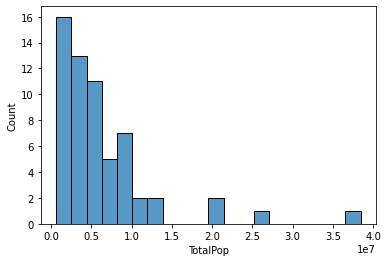

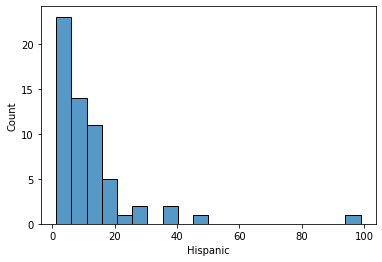

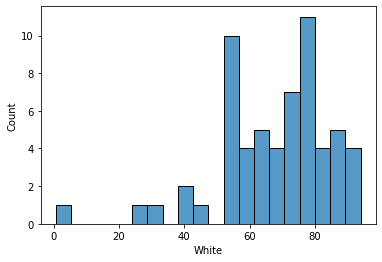

<Figure size 432x288 with 0 Axes>

In [37]:
columns = ['TotalPop', 'Hispanic', 'White', 'Black',
       'Native', 'Asian', 'Pacific', 'Income', 'GenderPop', 'Men', 'Women']


sns.histplot(us_census.TotalPop, bins=20)
plt.show()
plt.clf()

sns.histplot(us_census.Hispanic, bins=20)
plt.show()
plt.clf()

sns.histplot(us_census.White,bins= 20)
plt.show()
plt.clf()


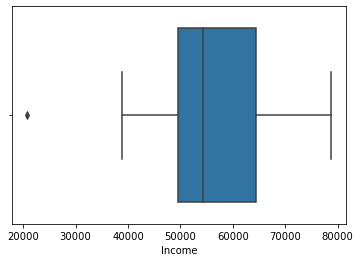

20720.54


<Figure size 432x288 with 0 Axes>

In [40]:
sns.boxplot(data = us_census, x = "Income")
plt.show()
plt.clf()

print(us_census['Income'].min())

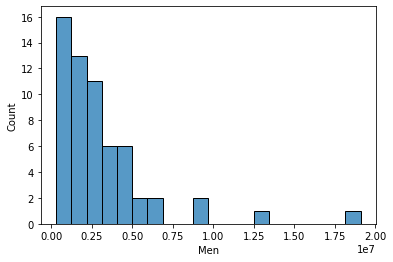

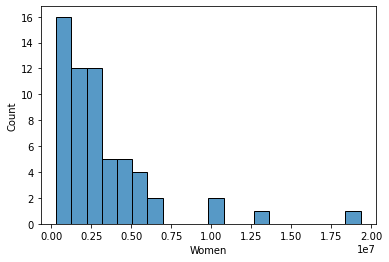

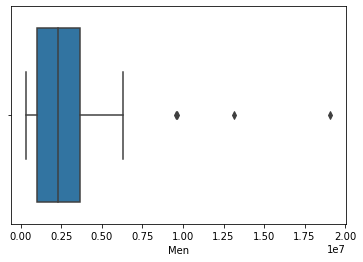

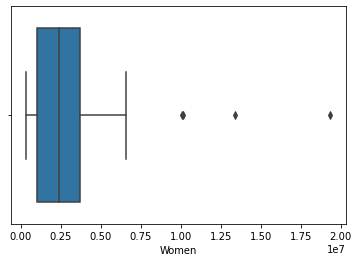

<Figure size 432x288 with 0 Axes>

In [45]:
sns.histplot(us_census.Men,bins= 20)
plt.show()
plt.clf()

sns.histplot(us_census.Women,bins= 20)
plt.show()
plt.clf()


sns.boxplot(data = us_census, x = "Men")
plt.show()
plt.clf()

sns.boxplot(data = us_census, x = "Women")
plt.show()
plt.clf()